In [ ]:
## Lead Score - Case Study

In [ ]:
##Problem Statement
#An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [3]:
## Loading and Cleaning Data

In [4]:
lead_df=pd.read_csv("C:\\Users\Pompy\\OneDrive\\Desktop\\lead scoring assignment\\leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_df.shape

(9240, 37)

In [6]:
lead_df.info

<bound method DataFrame.info of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct

In [7]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#checking for duplicates

In [9]:

sum(lead_df.duplicated(subset = 'Prospect ID')) == 0

True

In [10]:
sum(lead_df.duplicated(subset = 'Lead Number')) == 0


True

In [11]:
## Cleaning the Data frame

In [12]:
# Converting all the values to lower case
lead_df = lead_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [13]:
lead_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [14]:
lead_df = lead_df.replace('select',np.nan)

In [15]:
lead_df.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [16]:
#checking null values in each rows

lead_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [22]:
#checking percentage of null values in each column

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [23]:
cols=lead_df.columns

for i in cols:
    if((100*(lead_df[i].isnull().sum()/len(lead_df.index))) >= 45):
        lead_df.drop(i, 1, inplace = True)

In [24]:
#checking null values percentage

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [26]:
#checking value counts of Country column

lead_df['Country'].value_counts(dropna=False)

india                   6492
NaN                     2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

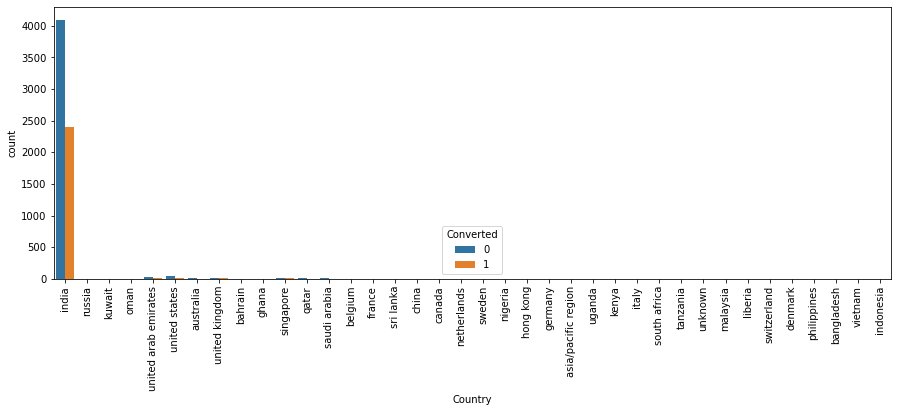

In [27]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Country, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [28]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead_df['Country'] = lead_df.apply(lambda x:slots(x['Country']), axis = 1)
lead_df['Country'].value_counts()

india            6492
outside india    2748
Name: Country, dtype: int64

In [30]:
cols_to_drop=['Country']

In [31]:
lead_df['City'].value_counts(dropna=False)

NaN                            3669
mumbai                         3222
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

In [32]:
lead_df['City'] = lead_df['City'].replace(np.nan,'Mumbai')

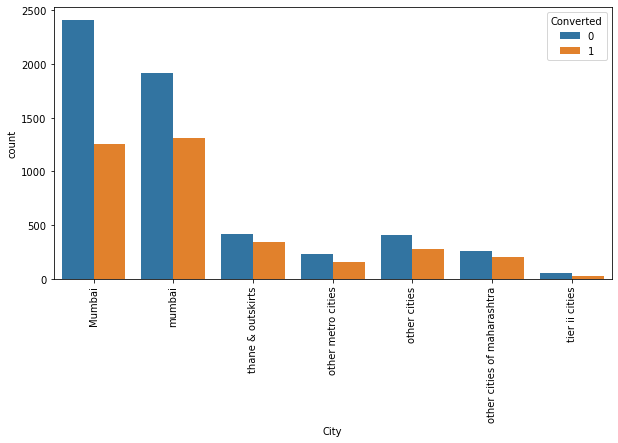

In [34]:
plt.figure(figsize=(10,5))
s1=sns.countplot(lead_df.City, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [35]:
lead_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [36]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'NA')

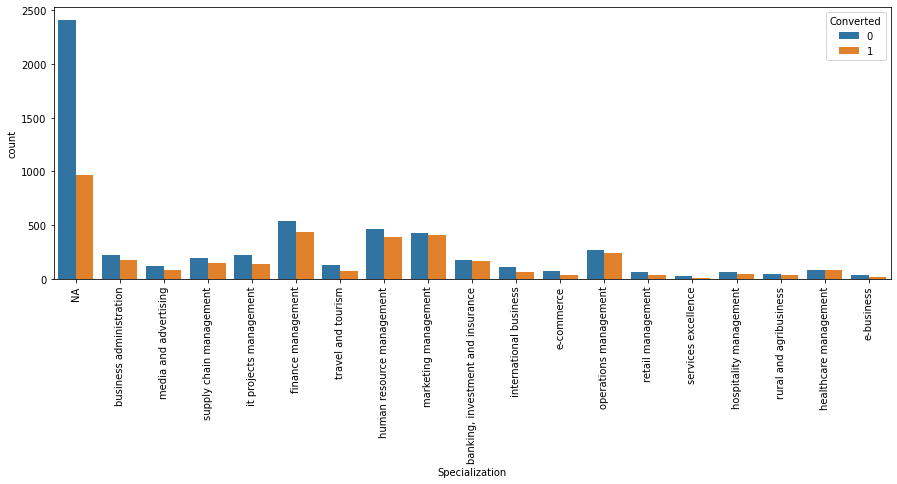

In [37]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Specialization, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [40]:
lead_df['Specialization'] = lead_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

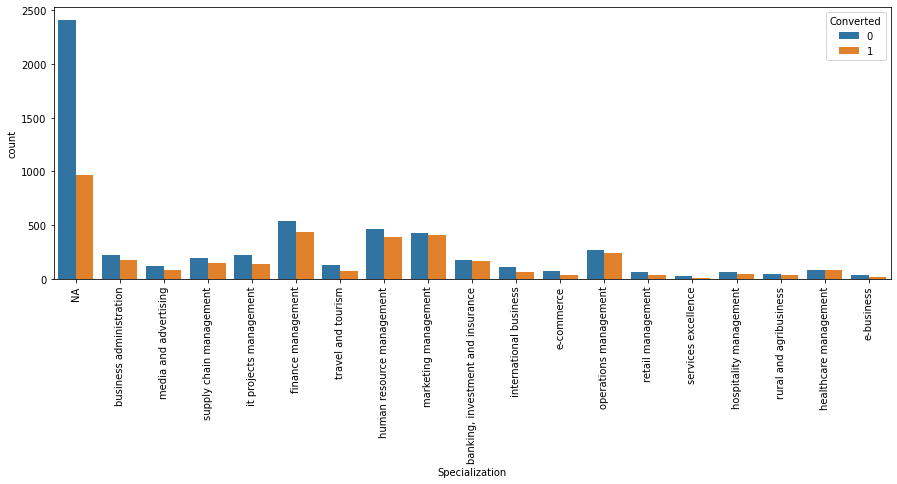

In [41]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Specialization, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [42]:
lead_df['What is your current occupation'].value_counts(dropna=False)

unemployed              5600
NaN                     2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [44]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [45]:
lead_df['What is your current occupation'].value_counts(dropna=False)

unemployed              5600
Unemployed              2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

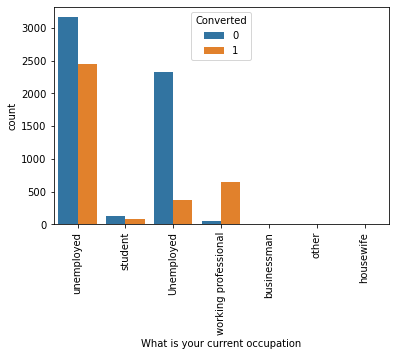

In [46]:
s1=sns.countplot(lead_df['What is your current occupation'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [47]:
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

better career prospects      6528
NaN                          2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [48]:
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better growth')

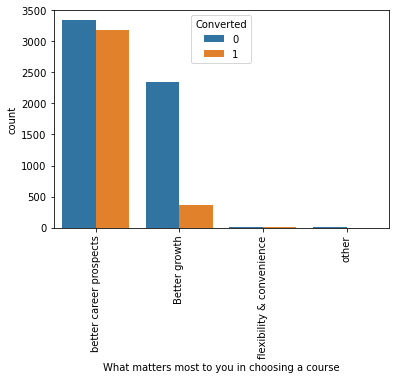

In [49]:
s1=sns.countplot(lead_df['What matters most to you in choosing a course'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [50]:
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

better career prospects      6528
Better growth                2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [51]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [53]:
lead_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [54]:
lead_df['Tags'] = lead_df['Tags'].replace(np.nan,'NA')

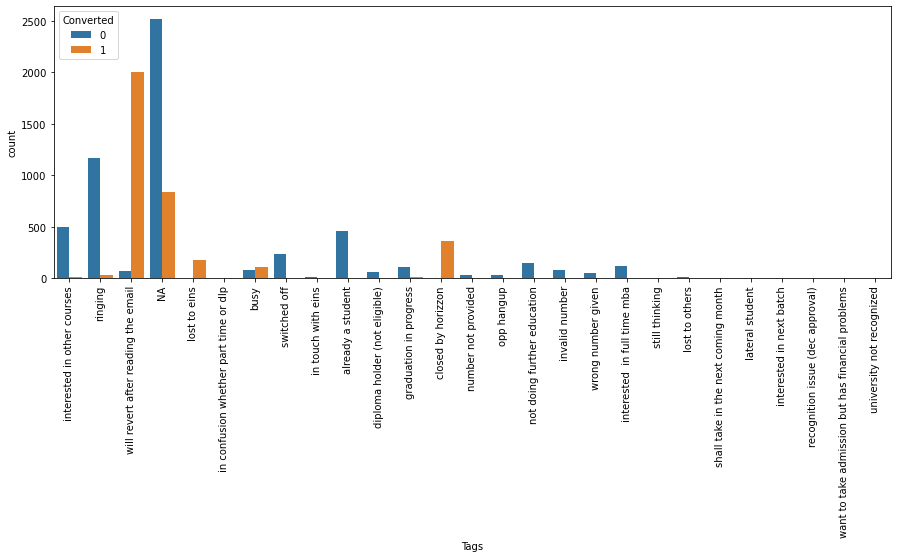

In [55]:

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Tags'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [56]:
lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

lead_df['Tags'] = lead_df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [57]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [58]:
lead_df['Lead Source'].value_counts(dropna=False)

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
youtubechannel          1
testone                 1
pay per click ads       1
welearnblog_home        1
welearn                 1
blog                    1
nc_edm                  1
Name: Lead Source, dtype: int64

In [59]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan,'unknown')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('Facebook','Social Media')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'unknown')  

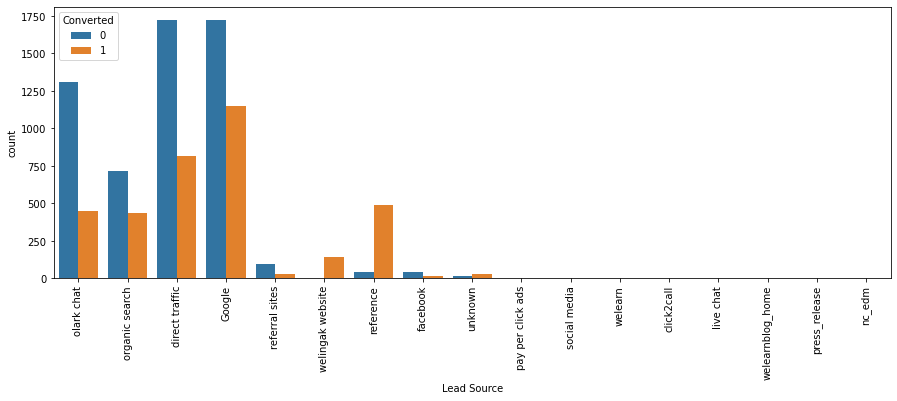

In [60]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['Lead Source'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [61]:
lead_df['Last Activity'].value_counts(dropna=False)

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
NaN                              103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [62]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan,'unknown')
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'unknown')

In [64]:
lead_df['Last Activity'].value_counts(dropna=False)

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unknown                          103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [65]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [66]:
lead_df = lead_df.dropna()

In [67]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [68]:
lead_df['Lead Origin'].value_counts(dropna=False)

landing page submission    4886
api                        3578
lead add form               608
lead import                  31
Name: Lead Origin, dtype: int64

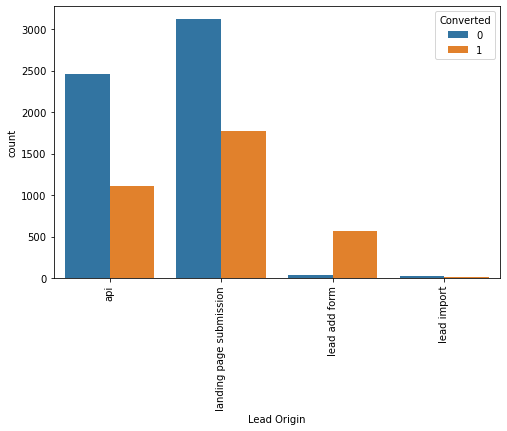

In [69]:
plt.figure(figsize=(8,5))
s1=sns.countplot(lead_df['Lead Origin'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

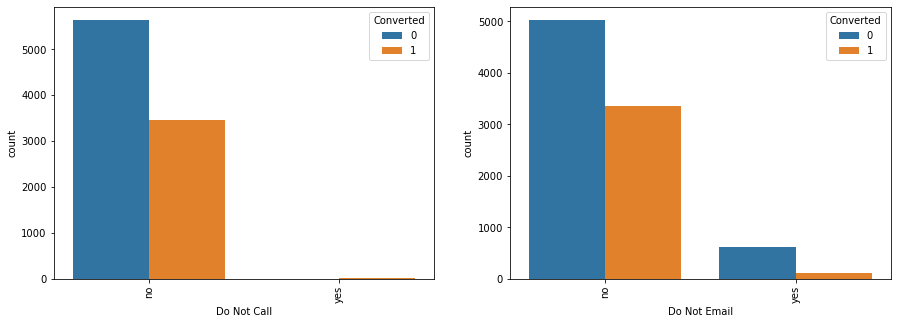

In [70]:
plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(lead_df['Do Not Call'], hue=lead_df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(lead_df['Do Not Email'], hue=lead_df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [71]:
lead_df['Do Not Call'].value_counts(dropna=False)

no     9101
yes       2
Name: Do Not Call, dtype: int64

In [72]:
lead_df['Do Not Email'].value_counts(dropna=False)

no     8379
yes     724
Name: Do Not Email, dtype: int64

In [73]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [74]:
lead_df.Search.value_counts(dropna=False)

no     9089
yes      14
Name: Search, dtype: int64

In [75]:
lead_df.Magazine.value_counts(dropna=False)

no    9103
Name: Magazine, dtype: int64

In [76]:
lead_df['Newspaper Article'].value_counts(dropna=False)

no     9101
yes       2
Name: Newspaper Article, dtype: int64

In [78]:
lead_df['X Education Forums'].value_counts(dropna=False)

no     9102
yes       1
Name: X Education Forums, dtype: int64

In [79]:
lead_df['Newspaper'].value_counts(dropna=False)

no     9102
yes       1
Name: Newspaper, dtype: int64

In [80]:
lead_df['Digital Advertisement'].value_counts(dropna=False)

no     9099
yes       4
Name: Digital Advertisement, dtype: int64

In [81]:
lead_df['Through Recommendations'].value_counts(dropna=False)

no     9096
yes       7
Name: Through Recommendations, dtype: int64

In [82]:
lead_df['Receive More Updates About Our Courses'].value_counts(dropna=False)

no    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [83]:
lead_df['Update me on Supply Chain Content'].value_counts(dropna=False)

no    9103
Name: Update me on Supply Chain Content, dtype: int64

In [84]:
lead_df['Get updates on DM Content'].value_counts(dropna=False)

no    9103
Name: Get updates on DM Content, dtype: int64

In [85]:
lead_df['I agree to pay the amount through cheque'].value_counts(dropna=False)

no    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [86]:
lead_df['A free copy of Mastering The Interview'].value_counts(dropna=False)

no     6215
yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [87]:
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [77]:
lead_df['Last Notable Activity'].value_counts()

modified                        3270
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

In [88]:
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

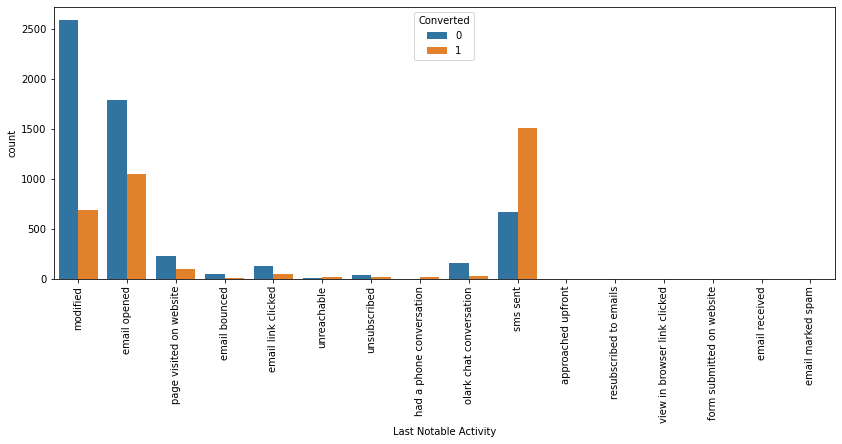

In [89]:
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [90]:
lead_df['Last Notable Activity'].value_counts()

modified                        3270
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

In [91]:
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [92]:
lead_df = lead_df.drop(cols_to_drop,1)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

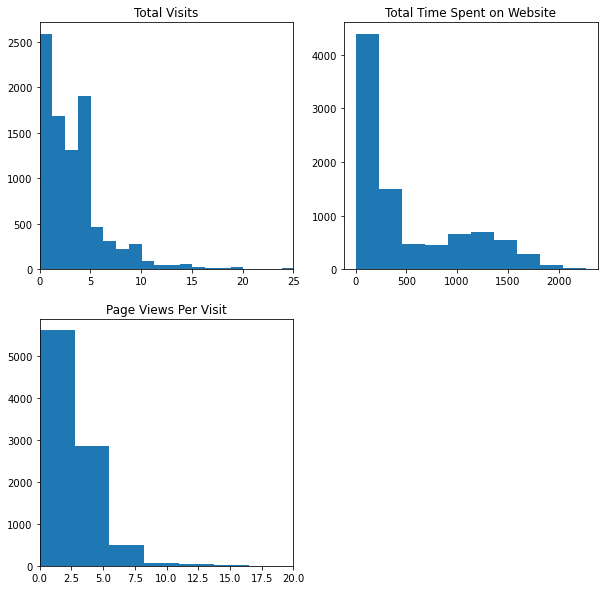

In [94]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

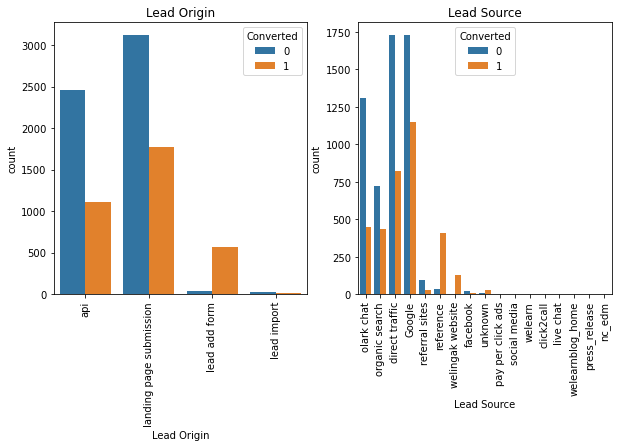

In [97]:

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

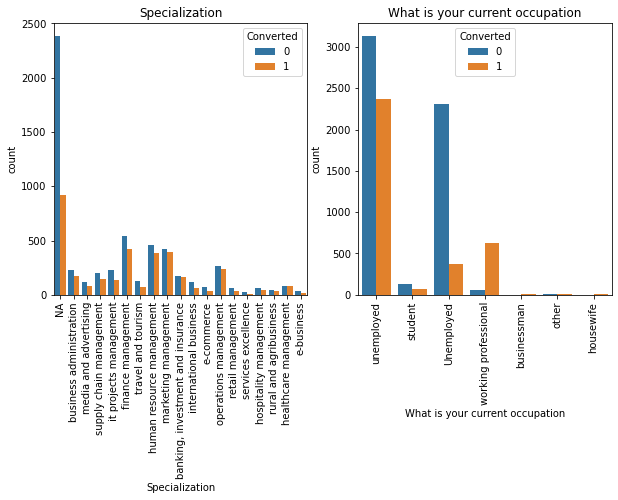

In [101]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()


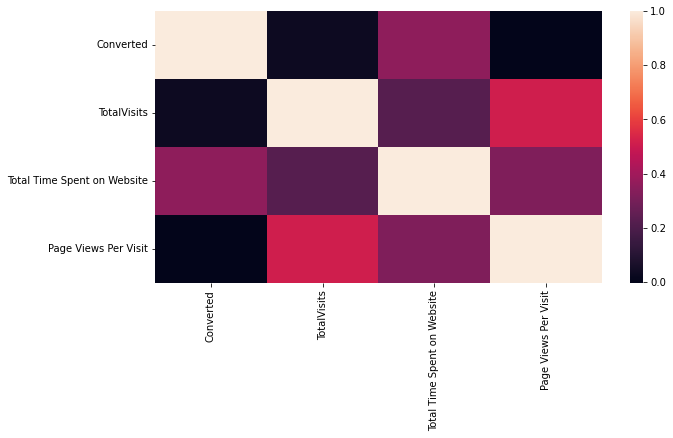

In [106]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(lead_df.corr())
plt.show()

In [107]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

38.02043282434362

In [108]:
numeric = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
99%,17.000000,1838.960000,9.000000
max,251.000000,2272.000000,55.000000


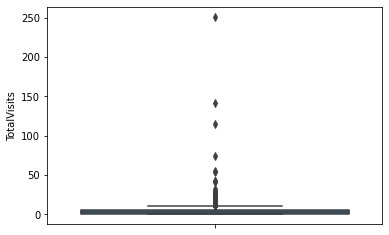

In [109]:

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

In [110]:

lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

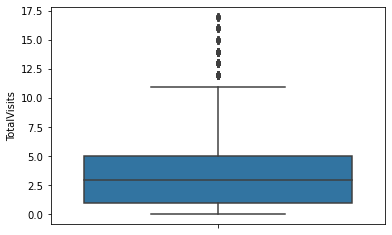

In [111]:
Q3 = lead_df.TotalVisits.quantile(0.99)
lead_df = lead_df[(lead_df.TotalVisits <= Q3)]
Q1 = lead_df.TotalVisits.quantile(0.01)
lead_df = lead_df[(lead_df.TotalVisits >= Q1)]
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

In [112]:
lead_df.shape

(9020, 14)

In [113]:
lead_df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

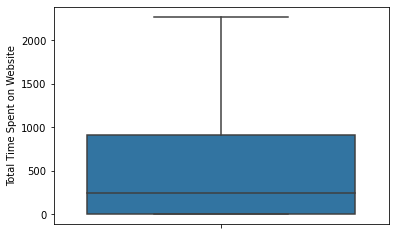

In [114]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['Total Time Spent on Website'])
plt.show()

In [115]:

lead_df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

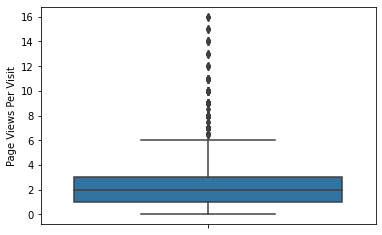

In [116]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

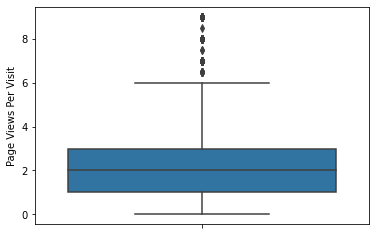

In [117]:
Q3 = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df['Page Views Per Visit'] <= Q3]
Q1 = lead_df['Page Views Per Visit'].quantile(0.01)
lead_df = lead_df[lead_df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()


In [119]:
lead_df.shape

(8953, 14)

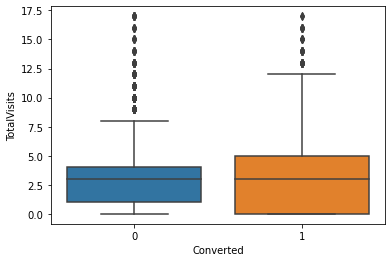

In [120]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

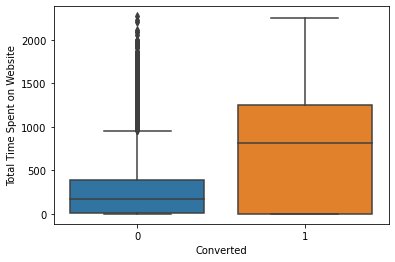

In [121]:
sns.boxplot(x=lead_df.Converted, y=lead_df['Total Time Spent on Website'])
plt.show()

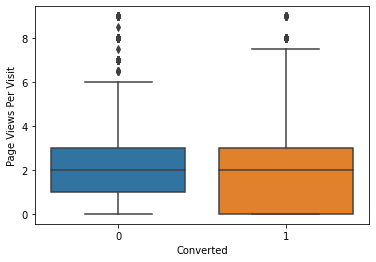

In [122]:
sns.boxplot(x=lead_df.Converted,y=lead_df['Page Views Per Visit'])
plt.show()

In [123]:

round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64